# Gradient Descent for Linear Regression (Single input)

The provided code implements the gradient descent algorithm for a single input. I am utilizing the ['sri-lanka-house-prices-dataset'](https://www.kaggle.com/datasets/lasaljaywardena/sri-lanka-house-prices-dataset) dataset obtained from Kaggle, which contains the prices of houses in various regions of Sri Lanka. However, in this implementation, i will use only 9 rows of data and consider the 'House size' column as the input.


In [177]:
# Install the Kaggle CLI (Command Line Interface) utility
!pip install -q kaggle

In [2]:
# Create a new directory named .kaggle
!mkdir ~/.kaggle

In [5]:
# Copy file kaggle.json to the .kaggle directory
!cp kaggle.json ~/.kaggle

In [6]:
# Sets the permissions of the kaggle.json file to be read and write only for the owner
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Using the Kaggle CLI to download a dataset from Kaggle.
!kaggle datasets download -d 'lasaljaywardena/sri-lanka-house-prices-dataset'

 61% 3.00M/4.88M [00:00<00:00, 5.64MB/s]
100% 4.88M/4.88M [00:00<00:00, 7.13MB/s]


In [8]:
import zipfile

In [9]:
# Extract zipfile
dataset_zip=zipfile.ZipFile('sri-lanka-house-prices-dataset.zip','r')
dataset_zip.extractall()
dataset_zip.close()

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [116]:
!pip install prettytable

In [183]:
# Read a CSV file named "house_prices.csv" and
# display the first 10 rows of the data
path = "house_prices.csv"
adv = pd.read_csv(path, usecols=['House size', 'Price'])
adv.head(10)

,Price,House size
0,"Rs 5,400,000","1,600.0 sqft"
1,"Rs 16,800,000","1,480.0 sqft"
2,"Rs 20,000,000","2,800.0 sqft"
3,"Rs 187,000,000","4,000.0 sqft"
4,"Rs 1,300,000",900.0 sqft
5,"Rs 55,000,000","3,300.0 sqft"
6,"Rs 45,000,000","4,100.0 sqft"
7,"Rs 16,700,000","1,400.0 sqft"
8,"Rs 50,000,000","4,000.0 sqft"
9,"Rs 16,000,000","2,000.0 sqft"


## Problem Statement

Predict house prices using house sizes as input. I am using 9 training data points, specifically the first 9 rows from the dataset, excluding the 4th row. The exclusion of the 4th row is necessary due to an unusually high house price value. It's important to note that this exclusion is part of my approach to effectively learn and apply the gradient descent algorithm in my analysis.

In [158]:
x_train = pd.concat([adv['House size'][:3], adv['House size'][4:10]]).values
y_train = pd.concat([adv['Price'][:3], adv['Price'][4:10]]).values

# Removing non-digit characters and converting to integer
x_train = [int(''.join(filter(str.isdigit, str(x)))) for x in x_train]
y_train = [int(''.join(filter(str.isdigit, str(y)))) for y in y_train]

print(f"x_train length: {len(x_train)}")
print(f"y_train length: {len(y_train)}")

x_train length: 9
y_train length: 9


In [159]:
from prettytable import PrettyTable

columns = ['House Size', 'Price']
data = list(zip(x_train, y_train))

table = PrettyTable()
table.field_names = columns

for row in data:
    table.add_row(row)
print(table)

+------------+----------+
| House Size |  Price   |
+------------+----------+
|   16000    | 5400000  |
|   14800    | 16800000 |
|   28000    | 20000000 |
|    9000    | 1300000  |
|   33000    | 55000000 |
|   41000    | 45000000 |
|   14000    | 16700000 |
|   40000    | 50000000 |
|   20000    | 16000000 |
+------------+----------+


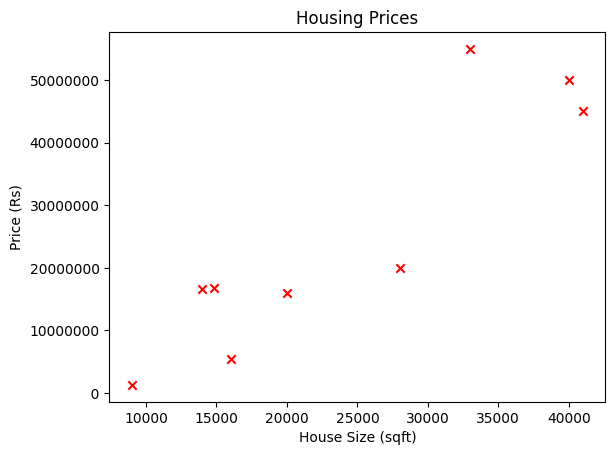

In [178]:
# Plot the data points/scatter plot
plt.scatter(x_train, y_train, color='red', marker='x')
# Set the title
plt.title("Housing Prices")
# Set the x-axis label
plt.xlabel('House Size (sqft)')
# Set the y-axis label and formatting
# to display the values as integers with a width of 8 characters
plt.ylabel('Price (Rs)')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%8.0f'))

plt.show()

## compute_cost

This function is used to calculate the cost function in the context of linear regression. In the context of linear regression, the cost function measures the overall error between the predicted values and the actual values of the target variable.

In [181]:
#Function to calculate the cost function
def compute_cost(x, y, w, b):

    # Total of training examples
    m = len(x_train)
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## compute_gradient

This function calculates the gradients of the cost function with respect to the parameters w and b in the context of linear regression. The function calculates the gradients using the partial derivatives of the cost function.The function returns these average gradients, which will be used in the gradient descent algorithm to update the model parameters w and b iteratively to minimize the cost function.

In [162]:
def compute_gradient(x, y, w, b):

    # Total of training examples
    m = len(x_train)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw = dj_dw + dj_dw_i
        dj_db = dj_db + dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

## gradien_descent

This function implements the gradient descent algorithm to minimize a cost function during training model.

In [176]:
def gradient_descent(x, y, w_in, b_in, alpha, iteration, cost_function, gradient_function):

    J_history = []  # An array to store cost values
    b = b_in
    w = w_in

    for i in range(iteration):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update parameters (w,b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost values at each iteration
        if i<iterations:
            J_history.append( cost_function(x, y, w , b))
        # Print cost values, w, and b each iteration
        print(f"Iteration {i:2}: Cost {J_history[-1]:0.2e} ",f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history

In [167]:
# Initialize parameters
w_init = 0
b_init = 0
# Some gradient descent settings
iterations = 15
tmp_alpha = 1.0e-9
# Run gradient descent
w_final, b_final, J_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"found by gradient descent: (w: {w_final:8.4f},b: {b_final:8.4f})")

Iteration  0: Cost 8.21e+13  w:  7.912e+02, b: 2.51333e-02
Iteration  1: Cost 4.57e+13  w:  1.028e+03, b: 3.12961e-02
Iteration  2: Cost 4.24e+13  w:  1.099e+03, b: 3.17805e-02
Iteration  3: Cost 4.21e+13  w:  1.120e+03, b: 3.05652e-02
Iteration  4: Cost 4.21e+13  w:  1.126e+03, b: 2.88411e-02
Iteration  5: Cost 4.21e+13  w:  1.128e+03, b: 2.69647e-02
Iteration  6: Cost 4.21e+13  w:  1.129e+03, b: 2.50427e-02
Iteration  7: Cost 4.21e+13  w:  1.129e+03, b: 2.31071e-02
Iteration  8: Cost 4.21e+13  w:  1.129e+03, b: 2.11673e-02
Iteration  9: Cost 4.21e+13  w:  1.129e+03, b: 1.92264e-02
Iteration 10: Cost 4.21e+13  w:  1.129e+03, b: 1.72851e-02
Iteration 11: Cost 4.21e+13  w:  1.129e+03, b: 1.53437e-02
Iteration 12: Cost 4.21e+13  w:  1.129e+03, b: 1.34023e-02
Iteration 13: Cost 4.21e+13  w:  1.129e+03, b: 1.14608e-02
Iteration 14: Cost 4.21e+13  w:  1.129e+03, b: 9.51934e-03
found by gradient descent: (w: 1129.1619,b:   0.0095)


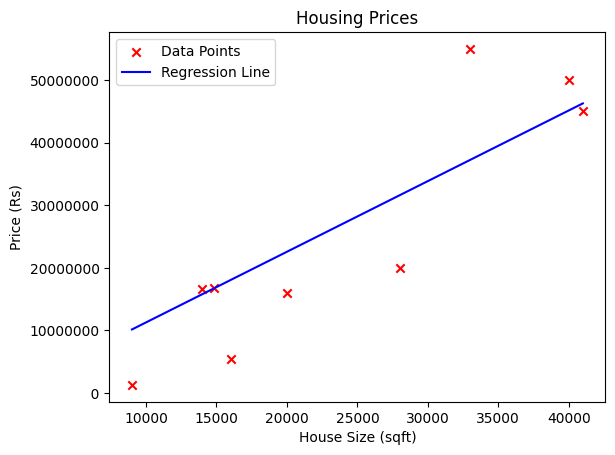

In [179]:
# Plot the data points/scatter plot
plt.scatter(x_train, y_train, label='Data Points', color='red', marker='x')

# Generate data for the line using the final w and b
x_line = np.linspace(min(x_train), max(x_train), 100)
y_line = w_final * x_line + b_final

# Plot the line
plt.plot(x_line, y_line, label='Regression Line', color='blue')

# Set labels and title
plt.title('Housing Prices')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price (Rs)')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%8.0f'))

plt.legend()
plt.show()

## Predictions

After obtaining the optimal values for the parameters w and b, we can now utilize the model to predict housing values based on our learned parameters.

In [174]:
print(f"Prediction for a 22000 sqft house: Rs.{w_final*22000 + b_final:0.1f}")
print(f"Prediction for a 15000 sqft house: Rs.{w_final*15000 + b_final:0.1f}")

Prediction for a 22000 sqft house: Rs.24841561.1
Prediction for a 15000 sqft house: Rs.16937428.0


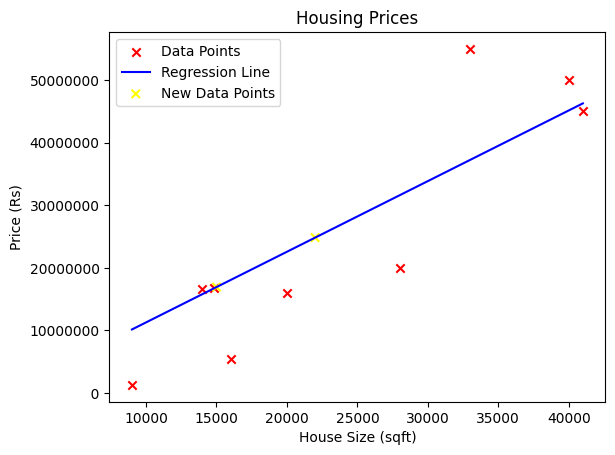

In [180]:
# Plot the data points/scatter plot
plt.scatter(x_train, y_train, label='Data Points', color='red', marker='x')

# Generate data for the line using the final w and b
x_line = np.linspace(min(x_train), max(x_train), 100)
y_line = w_final * x_line + b_final

# Generate new data points with different color
x_new = np.array([22000, 15000])
y_new = np.array([w_final*x + b_final for x in x_new])
colors = ['yellow', 'yellow']  # Different colors for the new data points

# Plot the line
plt.plot(x_line, y_line, label='Regression Line', color='blue')

# Plot the scatter plot for the new data
plt.scatter(x_new, y_new, label='New Data Points', color=colors, marker='x')

# Set labels and title
plt.title('Housing Prices')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price (Rs)')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%8.0f'))

plt.legend()
plt.show()